# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [2]:
X_train = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/X_train_normalized.csv", index_col=[0])
X_test = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/X_test_normalized.csv", index_col=[0])
y_train = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/y_train.csv", index_col=[0])
y_test = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/y_test.csv", index_col=[0]).reset_index(drop=True)

In [3]:
X_train.head(5)

,Symbol,Adj Close,Volume,S&P500,Unemployment Rate (%),Monthly Average Mortgage Rate (%),Corporate Bond Yield,Quarterly GDP Growth Rate (%),Home Price Index,Sector_Basic Materials,...,Adj Close 7-Day std,Volume 7-Day std,Distance to Adj Close 7-Day Upper Bollinger Band,Distance to Adj Close 7-Day Lower Bollinger Band,True Range,MACD,MACD Histogram,MACD-V,MACD-V Histogram,Stochastic Oscillator %K
0,1.286535,-0.383355,0.497834,-1.239088,0.560375,0.584924,1.117521,0.307606,-1.256557,-0.211114,...,-0.298140,0.117466,0.236149,-0.269833,-0.179460,0.072447,0.039464,0.014854,0.039632,0.703087
1,0.761917,-0.302460,-0.255973,-1.239088,0.560375,0.584924,1.117521,0.307606,-1.256557,-0.211114,...,-0.233517,-0.211044,0.243391,-0.149424,0.885117,0.151975,0.161407,-0.052661,0.081329,1.417437
2,0.407246,-0.278162,-0.224129,-1.239088,0.560375,0.584924,1.117521,0.307606,-1.256557,-0.211114,...,-0.351999,-0.236571,0.252801,-0.346142,-0.162364,0.013708,-0.023140,-0.053078,-0.030982,0.567310
3,-1.181385,-0.466305,-0.074461,-1.239088,0.560375,0.584924,1.117521,0.307606,-1.256557,4.736778,...,-0.314629,0.840247,0.234477,-0.300371,-0.561522,0.112365,0.184630,0.335596,0.463963,1.074077
4,-1.063162,-0.245769,0.243767,-1.239088,0.560375,0.584924,1.117521,0.307606,-1.256557,-0.211114,...,-0.167583,0.314758,0.004186,-0.287913,0.373985,-0.345611,-0.232172,-0.343499,-0.162136,-1.813621


In [4]:
X_test.head(5)

,Symbol,Adj Close,Volume,S&P500,Unemployment Rate (%),Monthly Average Mortgage Rate (%),Corporate Bond Yield,Quarterly GDP Growth Rate (%),Home Price Index,Sector_Basic Materials,...,Adj Close 7-Day std,Volume 7-Day std,Distance to Adj Close 7-Day Upper Bollinger Band,Distance to Adj Close 7-Day Lower Bollinger Band,True Range,MACD,MACD Histogram,MACD-V,MACD-V Histogram,Stochastic Oscillator %K
0,-0.206039,1.354258,-0.239400,2.512348,0.660965,-2.39954,-1.980584,0.463318,-1.894531,-0.211114,...,0.407697,-0.253133,-1.046621,-0.397982,1.822855,-1.005420,-0.094047,-0.448102,-0.054776,-1.373692
1,1.486038,0.647982,-0.252503,2.512348,0.660965,-2.39954,-1.980584,0.463318,-1.894531,-0.211114,...,0.175892,-0.254727,-0.482394,-0.204397,-0.192842,0.110104,-0.359390,0.080089,-0.458811,-0.991576
2,-0.693712,-0.384946,-0.124013,2.512348,0.660965,-2.39954,-1.980584,0.463318,-1.894531,-0.211114,...,-0.296192,-0.203749,0.161051,-0.346024,-0.244519,0.038039,-0.407160,-0.013546,-0.541751,-1.781038
3,0.983587,-0.011212,-0.130146,2.512348,0.660965,-2.39954,-1.980584,0.463318,-1.894531,-0.211114,...,-0.191586,-0.178147,0.173868,-0.149957,-0.289094,0.592527,-0.008127,0.766414,0.016781,0.774399
4,-1.203552,0.695478,-0.287889,2.512348,0.660965,-2.39954,-1.980584,0.463318,-1.894531,-0.211114,...,-0.062149,-0.281473,-0.023190,-0.132996,0.022698,0.972511,-0.299918,0.757151,-0.223332,0.644914


In [5]:
y_train.head(5)

,2-week Forward Excess Return Sign
0,-1.0
1,1.0
2,-1.0
3,1.0
4,-1.0


In [6]:
y_test.head(5)

,2-week Forward Excess Return Sign
0,-1.0
1,-1.0
2,1.0
3,1.0
4,1.0


# Fit Logistic Regression Model

### Check class imbalance

<Axes: title={'center': 'Frequency of each class in the training and test targets'}>

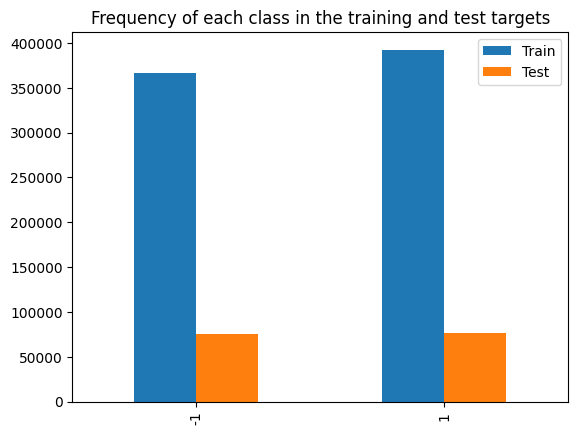

In [7]:
# Examine class imbalance in training and test sets
train_classes = y_train.value_counts().sort_index()
test_classes = y_test.value_counts().sort_index()
class_freq = pd.DataFrame(data=zip(train_classes, test_classes), columns=['Train', 'Test'], index=[-1, 1])
class_freq.plot(kind='bar', title='Frequency of each class in the training and test targets')

### Parameter Optimization

In [8]:
# Imports
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create base model
lr = LogisticRegression()

# Create time series split object to allow for CV without look-ahead bias
tscv = TimeSeriesSplit(n_splits=4)

In [9]:
# Create random search object
random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=grid,
    n_iter=12,
    cv=tscv,
    n_jobs=-1,
    scoring='accuracy',
    verbose=3,
    refit=False
)

# Fit the grid search to data
random_search.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 2/4] END C=0.001, penalty=l1, solver=liblinear;, score=0.497 total time=   9.4s
[CV 2/4] END C=0.001, penalty=l2, solver=liblinear;, score=0.504 total time=  37.5s
[CV 2/4] END C=0.01, penalty=l1, solver=liblinear;, score=0.491 total time= 1.7min
[CV 2/4] END C=0.01, penalty=l2, solver=liblinear;, score=0.491 total time= 1.4min
[CV 1/4] END C=0.1, penalty=l1, solver=liblinear;, score=0.499 total time= 5.8min
[CV 1/4] END C=0.1, penalty=l2, solver=liblinear;, score=0.496 total time= 1.8min
[CV 2/4] END C=0.1, penalty=l2, solver=liblinear;, score=0.488 total time= 3.6min
[CV 4/4] END C=0.1, penalty=l2, solver=liblinear;, score=0.491 total time= 7.5min
[CV 4/4] END .C=1, penalty=l1, solver=liblinear;, score=0.491 total time=94.2min
[CV 1/4] END C=10, penalty=l2, solver=liblinear;, score=0.487 total time= 9.0min
[CV 2/4] END C=10, penalty=l2, solver=liblinear;, score=0.486 total time=22.3min
[CV 4/4] END C=10, penalty=l2, solver=liblinear;, score=0.492 total time=17.6min
[CV 2/4] END C

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None),
                   estimator=LogisticRegression(), n_iter=12, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   refit=False, scoring='accuracy', verbose=3)

In [10]:
# Get results of all trained models
cv_results = random_search.cv_results_
print(cv_results)

# Get best params and score
best_params = random_search.best_params_
best_score = random_search.best_score_
print(f"Best params are {best_params}")
print(f"Best accuracy score is {best_score}")

# Save best parameters
import pickle
with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

{'mean_fit_time': array([  11.58971852,   59.6733557 ,  111.10705245,  134.77756363,
        650.07488918,  275.12286943, 3088.05271226,  591.01115876,
       4544.59992379, 1043.00515938, 4298.8583948 , 1305.27744246]), 'std_fit_time': array([   6.01408842,   38.49603425,   55.704927  ,   82.05567875,
        237.54430995,  125.95941857, 2086.30968133,  247.80325256,
       1498.87183004,  308.27183548, 1620.84772534,  313.03170324]), 'mean_score_time': array([0.09026295, 0.09360385, 0.09169483, 0.10580909, 0.09100521,
       0.09659725, 0.13567674, 0.10390717, 0.29600716, 0.10608494,
       0.16182399, 0.08767313]), 'std_score_time': array([0.00523078, 0.01993516, 0.00873826, 0.01868354, 0.00398255,
       0.00539506, 0.06240547, 0.0234446 , 0.16319655, 0.0118673 ,
       0.06783277, 0.01546283]), 'param_solver': masked_array(data=['liblinear', 'liblinear', 'liblinear', 'liblinear',
                   'liblinear', 'liblinear', 'liblinear', 'liblinear',
                   'liblinear',

### Train model

In [11]:
# Fit model with best params
lr = LogisticRegression(**best_params)
lr.fit(X_train, y_train)
lr.coef_

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.00000000e+00,  1.30526199e-02,  0.00000000e+00,
        -1.55503430e-02,  4.10288242e-03,  0.00000000e+00,
         1.68350319e-02,  4.53614096e-02,  0.00000000e+00,
        -9.90695644e-03, -7.95403778e-03,  0.00000000e+00,
        -6.63895057e-03, -5.24728532e-02,  0.00000000e+00,
         1.06542016e-02,  3.67473771e-03, -1.24705438e-03,
         3.60610396e-02, -6.37008312e-03, -1.17761654e-02,
         0.00000000e+00,  1.24952864e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -4.38264252e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.75978022e-02,  0.00000000e+00,
         0.00000000e+00, -1.91461706e-02,  3.15702794e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         7.31066401e-03,  0.00000000e+00,  5.61127285e-04,
         0.00000000e+00,  1.05750548e-03,  0.00000000e+00,
         1.65577975e-03,  0.00000000e+00,  0.00000000e+00,
        -2.30546512e-03, -7.62321732e-03,  7.17469014e-0

In [12]:
# Predict targets using fitted model
y_pred = lr.predict(X_test)

In [13]:
# Save model
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

# Results Analysis

In [14]:
# Imports needed for accuracy checks
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_auc_score, roc_curve

### Confusion Matrix
The confusion matrix shows us how our predicted labels compare to our actual labels.

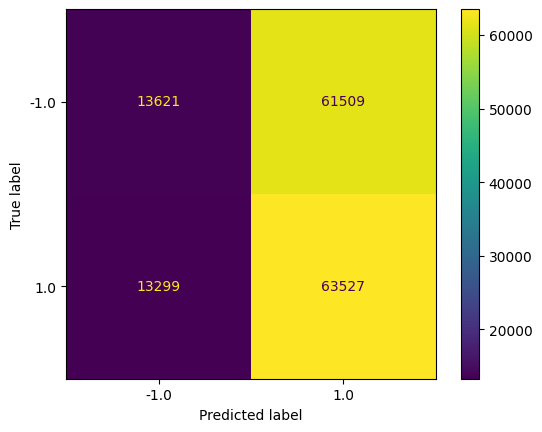

In [15]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

### Accuracy, Precision, Recall, F1-Score
* **Accuracy**: Measure of how good the classifier is at predicting correctly. It's simply the number of predictions the classifier got right divided by the total number of predicitions it made. In the confusion, matrix, it's the sum of the leading diagonal divided by the sum of the whole matrix.

* **Precision**: For a given class, this measures how good the classifier is at not incorrectly labelling something as the class. For the given class, it's simply the number of predictions that were correctly labelled as that class divided by the total number of predictions that were labelled with that class.

* **Recall**: For a given class, this measures how good the classifier is at correctly labelling something as that class. For the given class, it's simply the number of predictions that were correctly labelled as that class divided by the total number of actual instances of that class.

* **F1-Score**: For a given class, this is a weighted harmonic mean of precision and recall where each are given equal importance. The best F1-score is 1 and the worst is 0.

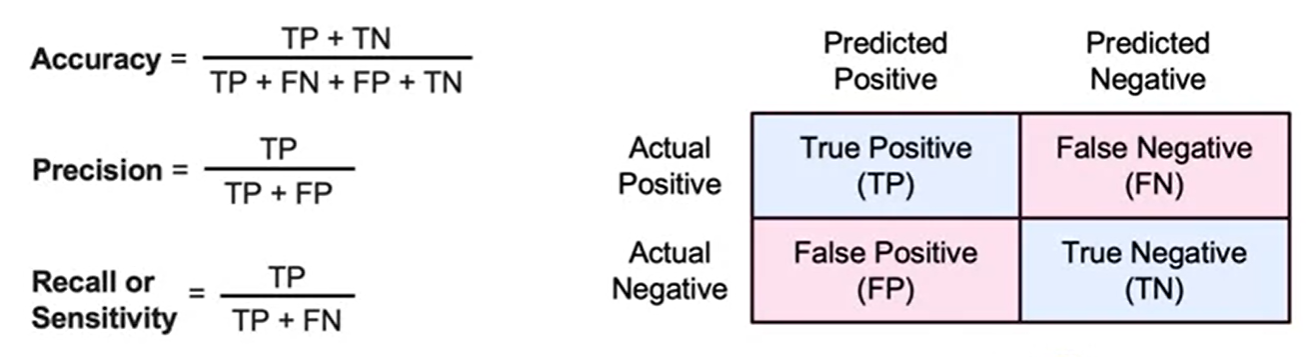
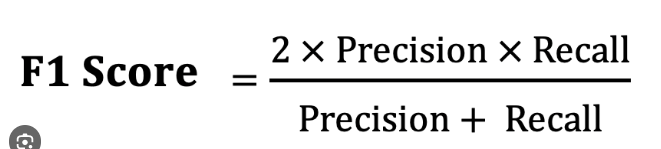

In [16]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is {accuracy}")

Accuracy is 0.5076995972518361


In [17]:
# Classification report showing precision, recall and F1 score for each class, as well accuracy and some averages
cr = classification_report(y_test, y_pred, digits=3)
print(cr)

              precision    recall  f1-score   support

        -1.0      0.506     0.181     0.267     75130
         1.0      0.508     0.827     0.629     76826

    accuracy                          0.508    151956
   macro avg      0.507     0.504     0.448    151956
weighted avg      0.507     0.508     0.450    151956



### ROC Curve

Remember that the Logistic Regression algorithm uses probabilities to predict the class of a sample. For example, if the probability the sample belongs to class A is greater than 0.5 then it will be classified as Class A and if it's less than 0.5 it will be classified as Class B. This probability (0.5 in this case) is called the 'classification threshold'. A higher/lower classification threshold can change which data samples get classified as each class.

The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (aka. recall) against the False Positive Rate for varying levels of this classification threshold. Use this article to continue descriptiion https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=An%20ROC%20curve%20(receiver%20operating,False%20Positive%20Rate

